## Final Project Submission

Please fill out:
* Student name: Abdulrahman Aber, Benjamin Bai, Charles Pan, Kevin Rivera
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: David Elliott
* Blog post URL:


# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sq
import seaborn as sns
conn = sq.connect('./zippedData/im.db')
cur = conn.cursor()

# BOM Movie Gross DF
Columns Removed: None

In [2]:
bom_movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# IMDB DB DFS

In [3]:
imdb_schema = pd.read_sql('''SELECT * FROM sqlite_master''',conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
writers_df = pd.read_sql('''select * from writers''', conn)
writers_df.head()
#writers kind of irrelevant for the question

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [5]:
writers_df.describe()

,movie_id,person_id
count,255873,255873
unique,110261,122576
top,tt4050462,nm6935209
freq,3818,543


In [6]:
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [7]:
principals_df = pd.read_sql('''select * from principals''', conn)
principals_df.head()
#useful for actor/actresses,, probably drop characters, job since job = none but category has actor

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [8]:
principals_df['person_id'].value_counts()

nm1930572    378
nm0000636    160
nm0000616    148
nm0103977    126
nm4394575    103
            ... 
nm0623661      1
nm6165996      1
nm6852799      1
nm7580830      1
nm8076264      1
Name: person_id, Length: 604546, dtype: int64

In [9]:
principals_df.describe()
#useless

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [10]:
principals_df.info()
#Probably filter out characters since we want actors/actresses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [11]:
movie_basics_df = pd.read_sql('''select * from movie_basics''', conn)
movie_basics_df.head()
#Very useful, movie_Id common denominator

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
movie_basics_df.info()
#Lots of nulls in RunTime_Minutes, quite a few in Genres and some in Original Title
#Could probably drop original title while cleaning the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
movie_basics_df.describe()
#Max 2115? Probably have to put a max on the SQL query for it, same for runtime 

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [14]:
directors_df = pd.read_sql("""select * from directors""",conn)
directors_df.head()
#Merge off of movie_id to main database
#Convert person_ID through persons_df
#Usable, directors are nice

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [15]:
directors_df['person_id'].value_counts()

nm6935209     238
nm2563700     190
nm1546474     185
nm3877467     180
nm3848412     144
             ... 
nm5974239       1
nm1319753       1
nm10648125      1
nm5382200       1
nm0286449       1
Name: person_id, Length: 109253, dtype: int64

In [16]:
directors_df.describe()
#nothing too relevant

,movie_id,person_id
count,291174,291174
unique,140417,109253
top,tt4050462,nm6935209
freq,3818,238


In [17]:
directors_df.info()
#complete data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [18]:
known_for_df = pd.read_sql("""select * from known_for""",conn)
known_for_df.head()
#I dont really think this data set is relevant - dropping it
#Based off data it seems to just be a person (would have to merge to person_df) and what movie theyre known for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [19]:
movie_akas_df = pd.read_sql("""select * from movie_akas""",conn)
movie_akas_df.head()
#Nothing too amazing, considering dropping this dataset

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [20]:
movie_akas_df.info()
#Tons of nulls in language, type, and attributes; even region 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [21]:
movie_akas_df.describe()
#Useless

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


In [22]:
movie_akas_df['movie_id'].value_counts()
#Tons of duplicates too based off movie id and how many regions released, probably irrelevant and too much information
#dropping this dataset too


tt2488496    61
tt1201607    55
tt2310332    55
tt2278871    53
tt1790809    53
             ..
tt7411490     1
tt2798172     1
tt6686224     1
tt3756472     1
tt3321688     1
Name: movie_id, Length: 122302, dtype: int64

In [23]:
movie_ratings_df = pd.read_sql("""select * from movie_ratings""",conn)
movie_ratings_df.head()
#Pretty useful information

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [24]:
movie_ratings_df.info()
#Full dataset, nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
round(movie_ratings_df.describe(),2)
#Rating scale looks clean, numvotes looks fine too since no negatives

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


In [26]:
bug = movie_ratings_df.describe()

In [27]:
movie_ratings_df['movie_id'].value_counts()
#No dupes

tt1718196    1
tt3837536    1
tt1815782    1
tt3043162    1
tt7952000    1
            ..
tt1518812    1
tt6781982    1
tt1665011    1
tt4697228    1
tt3645074    1
Name: movie_id, Length: 73856, dtype: int64

In [28]:
persons_df = pd.read_sql("""select * from persons""",conn)
persons_df.head()
#Super useful for mapping person ID to primary names, rest of the information is a bit much
#Primary profession could be useful but can't be connected to actual movies since no movie_Id in dataset
#birth_year

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [29]:
persons_df.describe()
#Probably remove dead people honestly

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [30]:
persons_df.info()
#Tons of null in birth year and death year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [31]:
subdir = pd.read_sql(
'''
SELECT
    dir.movie_id,
    per.primary_name
FROM
    directors as dir
    LEFT JOIN persons as per
        ON dir.person_id = per.person_id
WHERE
    per.death_year is null
''',
conn
)
subdir.head()
#Filters out dead directors for movies 

,movie_id,primary_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [32]:
subdir.shape

(289436, 2)

In [33]:
subpri = pd.read_sql(
'''
SELECT
    pri.movie_id,
    per.primary_name,
    pri.category
FROM
    principals as pri
    LEFT JOIN persons as per
        ON pri.person_id = per.person_id
WHERE
    (pri.category = 'actor'
    OR
    pri.category = 'actress'
    or
    pri.category = 'director')
    AND
    per.death_year is null
    AND
    per.primary_name is not null
''',
conn
)
subpri.head()
#Finding the actor/actresses, can be used to create a subquery
#director subquery potentially useless

,movie_id,primary_name,category
0,tt0111414,Tommy Dysart,actor
1,tt0111414,Frank Howson,director
2,tt0323808,Brittania Nicol,actress
3,tt0323808,Henry Garrett,actor
4,tt0323808,Graham McTavish,actor


In [34]:
subpri.shape

(544661, 3)

In [35]:
subpri['category'].value_counts()

actor       253619
director    145544
actress     145498
Name: category, dtype: int64

In [36]:
subpri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544661 entries, 0 to 544660
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie_id      544661 non-null  object
 1   primary_name  544661 non-null  object
 2   category      544661 non-null  object
dtypes: object(3)
memory usage: 12.5+ MB


In [37]:
imdb = pd.read_sql(
'''
SELECT
    mb.primary_title as MovieName,
    mb.start_year as StartYear,
    mb.runtime_minutes as RunTime,
    mb.genres as Genre,
    mr.averagerating as Rating,
    mr.numvotes as VoteCount   
FROM
    movie_basics as mb
    LEFT JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
WHERE
    mr.numvotes > 1000
    AND
    averagerating is not null
    AND
    start_year >= 2010
    and 
    runtime_minutes is not null
    and
    genres is not null 
''',
conn
)
imdb.head()
#overall imdb data, could be good for finding average ratings, genres, etc on whats good

,MovieName,StartYear,RunTime,Genre,Rating,VoteCount
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
1,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
2,Dark Blood,2012,86.0,Thriller,6.6,1053
3,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
4,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328


In [38]:
imdb.shape
#9601 movies left

(9601, 6)

In [39]:
imdb.info()
#no nulls pog

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MovieName  9601 non-null   object 
 1   StartYear  9601 non-null   int64  
 2   RunTime    9601 non-null   float64
 3   Genre      9601 non-null   object 
 4   Rating     9601 non-null   float64
 5   VoteCount  9601 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 450.2+ KB


In [40]:
imdb2 = imdb
#creating a new dataframe to not mess with the original

In [41]:
imdb2['Genre'] = imdb['Genre'].str.split(',')
#String splitting genre for exploding purposes

In [42]:
imdb2.head(20)
#check it

,MovieName,StartYear,RunTime,Genre,Rating,VoteCount
0,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
1,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248
2,Dark Blood,2012,86.0,[Thriller],6.6,1053
3,Wazir,2016,103.0,"[Action, Crime, Drama]",7.1,15378
4,The Wicker Tree,2011,96.0,"[Drama, Horror]",3.9,2328
5,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",5.5,1889
6,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886
7,The Evil Within,2017,98.0,[Horror],5.6,2420
8,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300
9,Fahrenheit 451,2018,100.0,"[Drama, Sci-Fi, Thriller]",4.9,14469


In [43]:
imdb2['StartYear'].value_counts()
#Checking range of years for data

2014    1187
2015    1126
2016    1114
2013    1102
2017    1086
2012    1041
2011     983
2010     924
2018     857
2019     181
Name: StartYear, dtype: int64

In [44]:
imdbexp = imdb2.explode('Genre')
#explode to separate all the genres

In [45]:
imdbexp.head(20)
#check it

,MovieName,StartYear,RunTime,Genre,Rating,VoteCount
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
1,Foodfight!,2012,91.0,Action,1.9,8248
1,Foodfight!,2012,91.0,Animation,1.9,8248
1,Foodfight!,2012,91.0,Comedy,1.9,8248
2,Dark Blood,2012,86.0,Thriller,6.6,1053
3,Wazir,2016,103.0,Action,7.1,15378
3,Wazir,2016,103.0,Crime,7.1,15378
3,Wazir,2016,103.0,Drama,7.1,15378
4,The Wicker Tree,2011,96.0,Drama,3.9,2328
4,The Wicker Tree,2011,96.0,Horror,3.9,2328


In [46]:
imdbexp.info()
#no nulls nice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21780 entries, 0 to 9600
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MovieName  21780 non-null  object 
 1   StartYear  21780 non-null  int64  
 2   RunTime    21780 non-null  float64
 3   Genre      21780 non-null  object 
 4   Rating     21780 non-null  float64
 5   VoteCount  21780 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [47]:
imdb_work = pd.read_sql(
'''
SELECT
    mb.start_year as MovieYear,
    mb.primary_title as MovieName,
    mr.averagerating as AvgRating,
    job.primary_name as Name,
    genres as Genre,
    job.category as Job
FROM
    (SELECT
        pri.movie_id,
        per.primary_name,
        pri.category
            FROM
        principals as pri
            LEFT JOIN persons as per
            ON pri.person_id = per.person_id
    WHERE
        (pri.category = 'actor'
        OR
        pri.category = 'actress'
        or
        pri.category = 'director')
        AND
        per.death_year is null
        AND
        per.primary_name is not null) as job
    LEFT JOIN movie_basics as mb
        ON job.movie_id = mb.movie_id
    LEFT JOIN movie_ratings as mr
        on job.movie_id = mr.movie_id
WHERE
    mr.numvotes > 1000
    AND
    averagerating is not null
    AND
    start_year >= 2010
    and 
    runtime_minutes is not null
    and
    genres is not null
ORDER BY
    job.primary_name,
    mb.start_year
''',
conn
)
imdb_work.head(10)
#This ensures actors or actresses with more than enough experience on an average rating
#this is only for names

,MovieYear,MovieName,AvgRating,Name,Genre,Job
0,2010,Caught in the Crossfire,4.5,50 Cent,"Action,Crime,Thriller",actor
1,2010,Gun,3.8,50 Cent,"Action,Crime,Thriller",actor
2,2011,All Things Fall Apart,5.5,50 Cent,"Drama,Sport",actor
3,2011,Setup,4.4,50 Cent,"Action,Crime,Drama",actor
4,2012,Freelancers,4.6,50 Cent,"Action,Crime,Drama",actor
5,2013,Escape Plan,6.7,50 Cent,"Action,Crime,Mystery",actor
6,2018,Den of Thieves,7.0,50 Cent,"Action,Crime,Drama",actor
7,2010,Darling,7.3,A. Karunakaran,"Comedy,Drama,Romance",director
8,2016,Phantasm: Ravager,5.1,A. Michael Baldwin,"Action,Fantasy,Horror",actor
9,2015,Ask Sana Benzer,3.8,A. Taner Elhan,Drama,director


In [48]:
imdb_workaction = imdb_work.loc[imdb_work['Genre'].str.contains('Action')]

In [50]:
imdb_workh = imdb_work.loc[imdb_work['Genre'].str.contains('Horror')]

In [51]:
imdb_workaction.head(2)

,MovieYear,MovieName,AvgRating,Name,Genre,Job
0,2010,Caught in the Crossfire,4.5,50 Cent,"Action,Crime,Thriller",actor
1,2010,Gun,3.8,50 Cent,"Action,Crime,Thriller",actor


In [52]:
imdb_workaction.shape

(10100, 6)

In [53]:
imdb_workh.head(2)

,MovieYear,MovieName,AvgRating,Name,Genre,Job
8,2016,Phantasm: Ravager,5.1,A. Michael Baldwin,"Action,Fantasy,Horror",actor
14,2016,The Stakelander,5.3,A.C. Peterson,"Action,Drama,Horror",actor


In [54]:
imdb_workh.shape

(6716, 6)

In [55]:
imdb_work.loc[imdb_work['Name'] == '50 Cent']['MovieYear'].corr(imdb_work.loc[imdb_work['Name'] == '50 Cent']['AvgRating'])
#testing code for correlation

0.8258218959300295

In [56]:
imdb_names = pd.read_sql(
'''
SELECT
    job.primary_name as Name,
    job.category as Job,
    genres as Genre,
    AVG(mr.averagerating) as Rating
FROM
    (SELECT
        pri.movie_id,
        per.primary_name,
        pri.category
            FROM
        principals as pri
            LEFT JOIN persons as per
            ON pri.person_id = per.person_id
    WHERE
        (pri.category = 'actor'
        OR
        pri.category = 'actress'
        or
        pri.category = 'director')
        AND
        per.death_year is null
        AND
        per.primary_name is not null) as job
    LEFT JOIN movie_basics as mb
        ON job.movie_id = mb.movie_id
    LEFT JOIN movie_ratings as mr
        on job.movie_id = mr.movie_id
WHERE
    mr.numvotes > 1000
    AND
    averagerating is not null
    AND
    start_year >= 2010
    and 
    runtime_minutes is not null
    and
    genres is not null
GROUP BY
    job.primary_name
HAVING
    count(mr.averagerating) > 4
ORDER BY
    AVG(mr.averagerating) DESC
''',
conn
)
imdb_names.head()
#This ensures actors or actresses with more than enough experience on an average rating
#this is only for names for all genres with a count above 5

,Name,Job,Genre,Rating
0,Achyuth Kumar,actor,"Drama,Romance,Sci-Fi",8.300000
1,Anjali,actress,Drama,8.120000
2,Leonardo DiCaprio,actor,"Biography,Crime,Drama",8.088889
3,Sreenivasan,actor,"Action,Adventure,Mystery",8.000000
4,Radha Ravi,actor,"Comedy,Crime,Thriller",7.983333


In [57]:
imdb_namesaction = pd.read_sql(
'''
SELECT
    job.primary_name as Name,
    job.category as Job,
    genres as Genre,
    AVG(mr.averagerating) as Rating
FROM
    (SELECT
        pri.movie_id,
        per.primary_name,
        pri.category
            FROM
        principals as pri
            LEFT JOIN persons as per
            ON pri.person_id = per.person_id
    WHERE
        (pri.category = 'actor'
        OR
        pri.category = 'actress'
        or
        pri.category = 'director')
        AND
        per.death_year is null
        AND
        per.primary_name is not null) as job
    LEFT JOIN movie_basics as mb
        ON job.movie_id = mb.movie_id
    LEFT JOIN movie_ratings as mr
        on job.movie_id = mr.movie_id
WHERE
    mr.numvotes > 1000
    AND
    averagerating is not null
    AND
    start_year >= 2010
    and 
    runtime_minutes is not null
    and
    genres like '%Action%'
GROUP BY
    job.primary_name
HAVING
    count(mr.averagerating) > 4
ORDER BY
    AVG(mr.averagerating) DESC
''',
conn
)
imdb_namesaction.head()
#This ensures actors or actresses with more than enough experience on an average rating
#this is only for names, this is for action only

,Name,Job,Genre,Rating
0,Fahadh Faasil,actor,"Action,Adventure,Drama",7.960000
1,Mark Ruffalo,actor,"Action,Adventure,Sci-Fi",7.800000
2,Robert Downey Jr.,actor,"Action,Adventure,Sci-Fi",7.744444
3,Vijay Sethupathi,actor,"Action,Comedy,Romance",7.700000
4,Chris Evans,actor,"Action,Adventure,Sci-Fi",7.633333


In [59]:
imdb_namesh = pd.read_sql(
'''
SELECT
    job.primary_name as Name,
    job.category as Job,
    genres as Genre,
    AVG(mr.averagerating) as Rating
FROM
    (SELECT
        pri.movie_id,
        per.primary_name,
        pri.category
            FROM
        principals as pri
            LEFT JOIN persons as per
            ON pri.person_id = per.person_id
    WHERE
        (pri.category = 'actor'
        OR
        pri.category = 'actress'
        or
        pri.category = 'director')
        AND
        per.death_year is null
        AND
        per.primary_name is not null) as job
    LEFT JOIN movie_basics as mb
        ON job.movie_id = mb.movie_id
    LEFT JOIN movie_ratings as mr
        on job.movie_id = mr.movie_id
WHERE
    mr.numvotes > 1000
    AND
    averagerating is not null
    AND
    start_year >= 2010
    and 
    runtime_minutes is not null
    and
    genres like '%Horror%'
GROUP BY
    job.primary_name
HAVING
    count(mr.averagerating) > 3
ORDER BY
    AVG(mr.averagerating) DESC
''',
conn
)
imdb_namesh.head()
#This ensures actors or actresses with more than enough experience on an average rating
#this is only for names, this is for horror with a count above 3

,Name,Job,Genre,Rating
0,Patrick Wilson,actor,"Horror,Mystery,Thriller",7.100
1,James Wan,director,"Horror,Mystery,Thriller",7.100
2,Anya Taylor-Joy,actress,"Horror,Mystery",6.625
3,Shôta Sometani,actor,"Horror,Thriller",6.575
4,Alper Mestçi,director,Horror,6.440


In [60]:
imdb_namesh.loc[imdb_namesh['Job']=='actor'].shape

(31, 4)

In [61]:
imdb_namesh.loc[imdb_namesh['Job']=='actress'].shape

(14, 4)

In [62]:
imdb_namesh.loc[imdb_namesh['Job']=='director'].shape

(20, 4)

In [63]:
imdb_namesh.shape

(65, 4)

In [64]:
imdb_namesaction.shape

(282, 4)

In [65]:
imdb_names.head(2)

,Name,Job,Genre,Rating
0,Achyuth Kumar,actor,"Drama,Romance,Sci-Fi",8.30
1,Anjali,actress,Drama,8.12


In [73]:
imdb_actorsh = imdb_namesh.loc[imdb_namesh['Job']=='actor'].reset_index(drop=True)
imdb_actorsh.head(2) #Actors only

,Name,Job,Genre,Rating
0,Patrick Wilson,actor,"Horror,Mystery,Thriller",7.100
1,Shôta Sometani,actor,"Horror,Thriller",6.575


In [74]:
actors_corrh = pd.DataFrame({'Correlation':[imdb_workh.loc[imdb_workh['Name'] == actor]['MovieYear'].corr(imdb_workh.loc[imdb_workh['Name'] == actor]['AvgRating']) for actor in imdb_actorsh['Name']]})
#creating correlation series for the actors with prior code

In [75]:
imdb_actorsh['Correlation'] = actors_corrh
imdb_actorsh.head(2)
#adding correlation to it

,Name,Job,Genre,Rating,Correlation
0,Patrick Wilson,actor,"Horror,Mystery,Thriller",7.100,0.443329
1,Shôta Sometani,actor,"Horror,Thriller",6.575,-0.575012


In [76]:
imdb_actorsh.info() #nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         31 non-null     object 
 1   Job          31 non-null     object 
 2   Genre        31 non-null     object 
 3   Rating       31 non-null     float64
 4   Correlation  31 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.3+ KB


In [77]:
imdb_actressh = imdb_namesh.loc[imdb_namesh['Job']=='actress'].reset_index(drop=True)
imdb_actressh.head(2) #Actress only

,Name,Job,Genre,Rating
0,Anya Taylor-Joy,actress,"Horror,Mystery",6.625
1,Briana Evigan,actress,"Drama,Horror,Thriller",6.000


In [78]:
actress_corrh = pd.DataFrame({'Correlation':[imdb_workh.loc[imdb_workh['Name'] == actress]['MovieYear'].corr(imdb_workh.loc[imdb_workh['Name'] == actress]['AvgRating']) for actress in imdb_actressh['Name']]})
actress_corrh.head(2) #Correlation for females

,Correlation
0,-0.130884
1,-0.254000


In [79]:
imdb_actressh['Correlation'] = actress_corrh
#Adding the correlation column to imdb actress

In [80]:
imdb_actressh.head(2) #Checking new data with corr

,Name,Job,Genre,Rating,Correlation
0,Anya Taylor-Joy,actress,"Horror,Mystery",6.625,-0.130884
1,Briana Evigan,actress,"Drama,Horror,Thriller",6.000,-0.254000


In [81]:
imdb_actressh.info() #All is well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         14 non-null     object 
 1   Job          14 non-null     object 
 2   Genre        14 non-null     object 
 3   Rating       14 non-null     float64
 4   Correlation  14 non-null     float64
dtypes: float64(2), object(3)
memory usage: 688.0+ bytes


In [82]:
imdb_directorh = imdb_namesh.loc[imdb_namesh['Job']=='director'].reset_index(drop=True)
imdb_directorh.head(10) #Director

,Name,Job,Genre,Rating
0,James Wan,director,"Horror,Mystery,Thriller",7.100000
1,Alper Mestçi,director,Horror,6.440000
2,Shinsuke Sato,director,"Action,Horror,Sci-Fi",6.350000
3,Mike Flanagan,director,"Drama,Horror,Mystery",6.300000
4,Hasan Karacadag,director,Horror,6.116667
5,Christopher Landon,director,"Action,Comedy,Horror",6.025000
6,Justin Benson,director,"Horror,Mystery,Thriller",5.925000
7,Aaron Moorhead,director,"Horror,Mystery,Thriller",5.925000
8,Adam Wingard,director,"Horror,Mystery,Thriller",5.916667
9,Takashi Miike,director,"Horror,Thriller",5.880000


In [83]:
director_corrh = pd.DataFrame({'Correlation':[imdb_workh.loc[imdb_workh['Name'] == director]['MovieYear'].corr(imdb_workh.loc[imdb_workh['Name'] == director]['AvgRating']) for director in imdb_directorh['Name']]})
director_corrh.head(2)  #Creating correlation for directors now

,Correlation
0,0.481125
1,0.976686


In [85]:
imdb_directorh['Correlation'] = director_corrh #putting the correlation into the directors

In [86]:
imdb_directorh.head(2) #All is well

,Name,Job,Genre,Rating,Correlation
0,James Wan,director,"Horror,Mystery,Thriller",7.10,0.481125
1,Alper Mestçi,director,Horror,6.44,0.976686


In [84]:
imdb_directorh.info() #All is well, only 85 directors weird

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    20 non-null     object 
 1   Job     20 non-null     object 
 2   Genre   20 non-null     object 
 3   Rating  20 non-null     float64
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


Text(0, 0.5, 'Correlation of Movie Rating from 2010-2019')

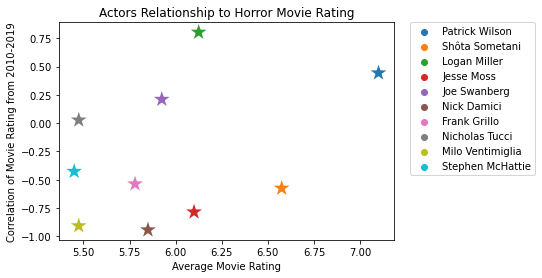

In [91]:
scatact = sns.scatterplot(x='Rating',y='Correlation',hue='Name',data=imdb_actorsh.head(10), marker = '*', s=500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Actors Relationship to Horror Movie Rating')
plt.xlabel('Average Movie Rating')
plt.ylabel('Correlation of Movie Rating from 2010-2019')

Text(0, 0.5, 'Correlation of Movie Rating from 2010-2019')

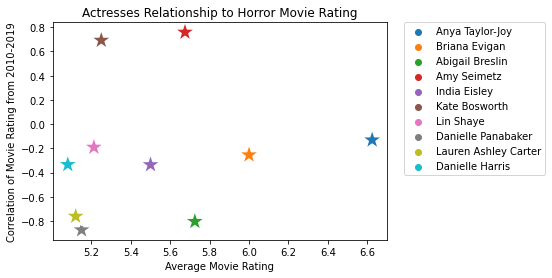

In [92]:
scatact = sns.scatterplot(x='Rating',y='Correlation',hue='Name',data=imdb_actressh.head(10), marker = '*', s=500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Actresses Relationship to Horror Movie Rating')
plt.xlabel('Average Movie Rating')
plt.ylabel('Correlation of Movie Rating from 2010-2019')

Text(0, 0.5, 'Correlation of Movie Rating from 2010-2019')

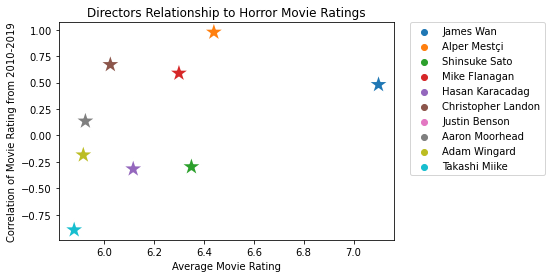

In [93]:
scatdir = sns.scatterplot(x='Rating',y='Correlation',hue='Name',data=imdb_directorh.head(10), marker = '*', s=500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Directors Relationship to Horror Movie Ratings')
plt.xlabel('Average Movie Rating')
plt.ylabel('Correlation of Movie Rating from 2010-2019')

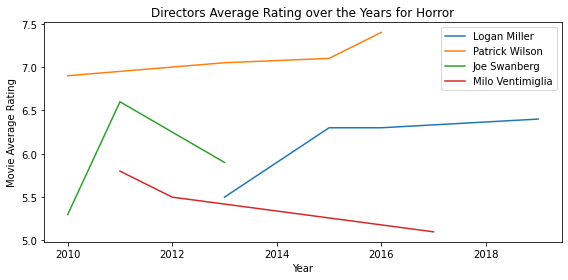

In [94]:
logan = imdb_workh.loc[imdb_workh['Name']=='Logan Miller'].groupby('MovieYear').mean()
patrick = imdb_workh.loc[imdb_workh['Name']=='Patrick Wilson'].groupby('MovieYear').mean()
joe = imdb_workh.loc[imdb_workh['Name']=='Joe Swanberg'].groupby('MovieYear').mean()
milo = imdb_workh.loc[imdb_workh['Name']=='Milo Ventimiglia'].groupby('MovieYear').mean()
#Setting up infrastructure for the chart
#Used to groupby and average out movie ratings from the same year
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(logan.index.values, 'AvgRating', data=logan, label='Logan Miller')
ax.plot(patrick.index.values, 'AvgRating', data=patrick, label='Patrick Wilson')
ax.plot(joe.index.values, 'AvgRating', data=joe, label='Joe Swanberg')
ax.plot(milo.index.values, 'AvgRating', data=milo, label='Milo Ventimiglia')
ax.set_xlabel('Year')
ax.set_ylabel('Movie Average Rating')
ax.set_title('Directors Average Rating over the Years for Horror')
plt.tight_layout()
leg = ax.legend();
#Line chart for directors, recommend Logan, Patrick, Joe; Milo is an example of bad correlation

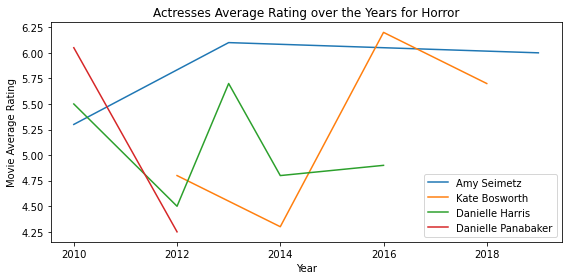

In [95]:
amy = imdb_workh.loc[imdb_workh['Name']=='Amy Seimetz'].groupby('MovieYear').mean()
kate = imdb_workh.loc[imdb_workh['Name']=='Kate Bosworth'].groupby('MovieYear').mean()
danielle = imdb_workh.loc[imdb_workh['Name']=='Danielle Harris'].groupby('MovieYear').mean()
danielle2 = imdb_workh.loc[imdb_workh['Name']=='Danielle Panabaker'].groupby('MovieYear').mean()
#Setting up infrastructure for the chart
#Used to groupby and average out movie ratings from the same year
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(amy.index.values, 'AvgRating', data=amy, label='Amy Seimetz')
ax.plot(kate.index.values, 'AvgRating', data=kate, label='Kate Bosworth')
ax.plot(danielle.index.values, 'AvgRating', data=danielle, label='Danielle Harris')
ax.plot(danielle2.index.values, 'AvgRating', data=danielle2, label='Danielle Panabaker')
ax.set_xlabel('Year')
ax.set_ylabel('Movie Average Rating')
ax.set_title('Actresses Average Rating over the Years for Horror')
plt.tight_layout()
leg = ax.legend();
#Line chart for actress, recommend Amy, Kate, Danielle Harris; Danielle Panabaker is an example of bad correlation

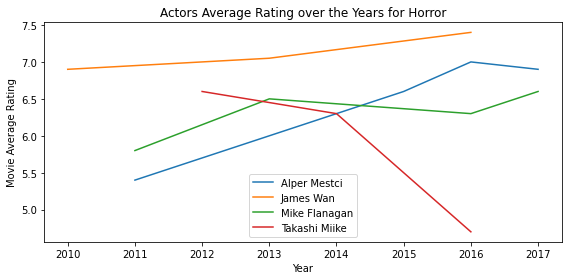

In [101]:
alper = imdb_workh.loc[imdb_workh['Name']=='Alper Mestçi'].groupby('MovieYear').mean()
james = imdb_workh.loc[imdb_workh['Name']=='James Wan'].groupby('MovieYear').mean()
mike = imdb_workh.loc[imdb_workh['Name']=='Mike Flanagan'].groupby('MovieYear').mean()
takashi = imdb_workh.loc[imdb_workh['Name']=='Takashi Miike'].groupby('MovieYear').mean()
#Setting up infrastructure for the chart
#Used to groupby and average out movie ratings from the same year
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(alper.index.values, 'AvgRating', data=alper, label='Alper Mestci')
ax.plot(james.index.values, 'AvgRating', data=james, label='James Wan')
ax.plot(mike.index.values, 'AvgRating', data=mike, label='Mike Flanagan')
ax.plot(takashi.index.values, 'AvgRating', data=takashi, label='Takashi Miike')
ax.set_xlabel('Year')
ax.set_ylabel('Movie Average Rating')
ax.set_title('Actors Average Rating over the Years for Horror')
plt.tight_layout()
leg = ax.legend();
#Line chart for Actors recommend Alper, James, Make; Takashii is an example of bad correlation

# RT Movie Info DF
Columns Removed: Synopsis, Currency, Box_Office (getting box office data elsewhere)
Note - Break genres into multiple columns or somehow else clean it or just do contains

In [ ]:
rt_movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info_df.head()

# RT Reviews DF
Columns Removed: Review, Critic, Top_Critic
Note - can we link this to movie names? scrape movie titles from ID?

In [ ]:
rt_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')
rt_reviews_df.head()

# TMDB Movies DF
- Remove Columns: Unnamed: 0, TBD

In [ ]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()

# TN Movie Budgets DF
Remove Columns: None

In [ ]:
tn_movie_budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df.head()